In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных по коду с ошибками

Загрузим данные по коду с ошибками без разбиения на обучающую, валидационную и тестовую выборки.

In [2]:
path_to_data = '/home/kks/zephyr_data/buggy_code/'
source_code_data = pd.read_pickle(path_to_data + 'filtered_traceback_bugfixes_metrics.pickle')

In [3]:
metric_names = ['cc_before', 'cc_after', 'is function_before', 'is function_after',
                'cc_rank_before', 'cc_rank_after', 'N1_before', 'N1_after', 'N2_before',
                'N2_after', 'bugs_before', 'bugs_after', 'calculated_length_before',
                'calculated_length_after', 'difficulty_before', 'difficulty_after',
                'effort_before', 'effort_after', 'h1_before', 'h1_after', 'h2_before',
                'h2_after', 'length_before', 'length_after', 'time_before',
                'time_after', 'vocabulary_before', 'vocabulary_after', 'volume_before',
                'volume_after', 'blank_before', 'blank_after', 'comments_before',
                'comments_after', 'lloc_before', 'lloc_after', 'loc_before',
                'loc_after', 'multi_before', 'multi_after', 'single_comments_before',
                'single_comments_after', 'sloc_before', 'sloc_after', 'MI_before',
                'MI_after']

Посмотрим на таблицу со значениями метрик:

In [4]:
source_code_data[metric_names]

,cc_before,cc_after,is function_before,is function_after,cc_rank_before,cc_rank_after,N1_before,N1_after,N2_before,N2_after,...,loc_before,loc_after,multi_before,multi_after,single_comments_before,single_comments_after,sloc_before,sloc_after,MI_before,MI_after
0,7,7,True,True,B,B,11,11,19,19,...,93,93,66,66,0,0,19,19,73.117393,73.117393
1,1,1,True,True,A,A,6,8,7,11,...,28,28,0,0,4,4,22,22,81.940440,79.900328
94,1,1,True,True,A,A,0,0,0,0,...,60,61,43,43,0,0,11,12,100.000000,100.000000
178,8,10,True,True,B,B,10,12,18,22,...,130,132,90,90,0,0,26,27,55.824810,53.923789
179,14,10,True,True,C,C,18,14,34,25,...,80,64,0,0,24,22,53,39,72.678590,77.247169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625588,15,14,True,True,C,C,11,11,21,21,...,24,21,0,0,0,0,21,18,53.525163,55.048541
625628,3,3,True,True,A,A,9,9,17,16,...,39,39,9,9,1,1,23,23,66.803447,66.971842
625629,5,5,True,True,A,A,6,6,12,11,...,17,17,0,0,1,1,15,15,74.900752,75.153045
625630,15,15,True,True,C,C,14,14,24,24,...,39,39,0,0,1,1,28,28,65.854216,65.854216


# Описание датасета с ошибками на уровне метрик

# Сырые метрики

## Длина кода сниппетов

Посмотрим на распределение сниппетов кода с ошибками и сниппетов кода сразу после исправления ошибок по длине (метрика source lines of code, sloc). При расчете этой метрики учитываются только строки с исходным кодом. Подсчитаем различные статистики по этой метрике.

In [5]:
print(f'Среднее значение числа строк кода равно {source_code_data["sloc_before"].mean()}.')
print(f'Медиана числа строк кода равна {source_code_data["sloc_before"].median()}.')
print(f'С.к.о числа строк кода равно {source_code_data["sloc_before"].std()}.')
print(f'25-й персентиль числа строк кода равен {source_code_data["sloc_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа строк кода равен {source_code_data["sloc_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа строк кода равен {source_code_data["sloc_before"].quantile(q=0.90)}.')
print(f'Минимум числа строк кода равен {source_code_data["sloc_before"].min()}.')
print(f'Максимум числа строк кода равен {source_code_data["sloc_before"].max()}.')

Среднее значение числа строк кода равно 32.00735200373975.
Медиана числа строк кода равна 17.0.
С.к.о числа строк кода равно 61.18552105477834.
25-й персентиль числа строк кода равен 8.0.
75-й персентиль числа строк кода равен 35.0.
90-й персентиль числа строк кода равен 69.0.
Минимум числа строк кода равен 1.
Максимум числа строк кода равен 3872.


Таким образом, 90% сниппетов кода с ошибками имеют длину до 52 строк, а 75% из них - длину до 52.

Теперь по коду после исправления:

In [6]:
print(f'Среднее значение числа строк кода равно {source_code_data["sloc_after"].mean()}.')
print(f'Медиана числа строк кода равна {source_code_data["sloc_after"].median()}.')
print(f'С.к.о числа строк кода равно {source_code_data["sloc_after"].std()}.')
print(f'25-й персентиль числа строк кода равен {source_code_data["sloc_after"].quantile(q=0.25)}.')
print(f'75-й персентиль числа строк кода равен {source_code_data["sloc_after"].quantile(q=0.75)}.')
print(f'90-й персентиль числа строк кода равен {source_code_data["sloc_after"].quantile(q=0.90)}.')
print(f'Минимум числа строк кода равен {source_code_data["sloc_after"].min()}.')
print(f'Максимум числа строк кода равен {source_code_data["sloc_after"].max()}.')

Среднее значение числа строк кода равно 33.16391143597807.
Медиана числа строк кода равна 18.0.
С.к.о числа строк кода равно 61.543881357079876.
25-й персентиль числа строк кода равен 9.0.
75-й персентиль числа строк кода равен 37.0.
90-й персентиль числа строк кода равен 71.0.
Минимум числа строк кода равен 1.
Максимум числа строк кода равен 3878.


Таким образом, в целом длина кода удлинняется в процессе исправления, но не очень существенно.

## Число утверждений (statements)

Подсчитаем количество логических утверждений в коде сниппетов с ошибками. Одна строка кода может содержать несколько логических утверждений.

In [7]:
print(f'Среднее значение числа утверждений равно {source_code_data["lloc_before"].mean()}.')
print(f'Медиана числа утверждений равна {source_code_data["lloc_before"].median()}.')
print(f'С.к.о числа утверждений равно {source_code_data["lloc_before"].std()}.')
print(f'25-й персентиль числа утверждений равен {source_code_data["lloc_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа утверждений равен {source_code_data["lloc_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа утверждений равен {source_code_data["lloc_before"].quantile(q=0.90)}.')
print(f'Минимум числа утверждений равен {source_code_data["lloc_before"].min()}.')
print(f'Максимум числа утверждений равен {source_code_data["lloc_before"].max()}.')

Среднее значение числа утверждений равно 25.40652755938974.
Медиана числа утверждений равна 15.0.
С.к.о числа утверждений равно 37.46334497388983.
25-й персентиль числа утверждений равен 7.0.
75-й персентиль числа утверждений равен 29.0.
90-й персентиль числа утверждений равен 54.0.
Минимум числа утверждений равен 2.
Максимум числа утверждений равен 896.


Посмотрим на взаимное распределение числа строк и числа утверждений:

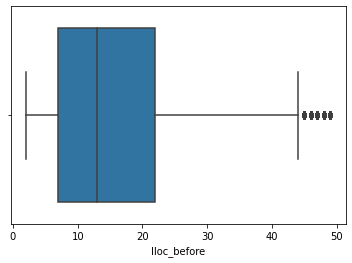

In [8]:
sns.boxplot(x='lloc_before',
            data=source_code_data.loc[source_code_data['lloc_before'] < 50]);

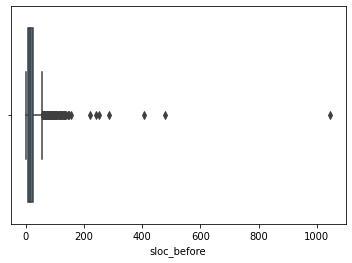

In [9]:
sns.boxplot(x='sloc_before',
            data=source_code_data.loc[source_code_data['lloc_before'] < 50]);

Посмотрим на отношение:

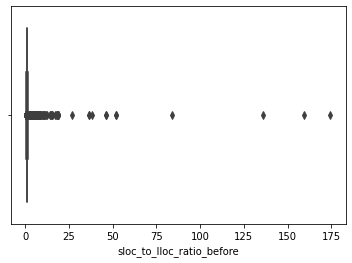

In [10]:
source_code_data['sloc_to_lloc_ratio_before'] = source_code_data['sloc_before'] / source_code_data['lloc_before']
sns.boxplot(x='sloc_to_lloc_ratio_before',
            data=source_code_data);

In [11]:
print(f'Медиана отношения равна {source_code_data["sloc_to_lloc_ratio_before"].median()}.')

Медиана отношения равна 1.0357142857142858.


Таким образом, половина сниппетов имеют отношение числа строк кода к числу утверждений близкое к 1, т.е. в одной строке расположено примерно одно утверждение.

Теперь по коду после исправления:

In [12]:
print(f'Среднее значение числа утверждений равно {source_code_data["lloc_after"].mean()}.')
print(f'Медиана числа утверждений равна {source_code_data["lloc_after"].median()}.')
print(f'С.к.о числа утверждений равно {source_code_data["lloc_after"].std()}.')
print(f'25-й персентиль числа утверждений равен {source_code_data["lloc_after"].quantile(q=0.25)}.')
print(f'75-й персентиль числа утверждений равен {source_code_data["lloc_after"].quantile(q=0.75)}.')
print(f'90-й персентиль числа утверждений равен {source_code_data["lloc_after"].quantile(q=0.90)}.')
print(f'Минимум числа утверждений равен {source_code_data["lloc_after"].min()}.')
print(f'Максимум числа утверждений равен {source_code_data["lloc_after"].max()}.')

Среднее значение числа утверждений равно 26.288598019633675.
Медиана числа утверждений равна 16.0.
С.к.о числа утверждений равно 37.77800654635714.
25-й персентиль числа утверждений равен 8.0.
75-й персентиль числа утверждений равен 30.0.
90-й персентиль числа утверждений равен 56.0.
Минимум числа утверждений равен 2.
Максимум числа утверждений равен 895.


Здесь также видно, что код немного удлинняется.

## Число однострочных комментариев

Вначале по коду с ошибками.

In [13]:
print(f'Среднее значение числа однострочных комментариев равно {source_code_data["single_comments_before"].mean()}.')
print(f'Медиана числа однострочных комментариев равна {source_code_data["single_comments_before"].median()}.')
print(f'С.к.о числа однострочных комментариев равно {source_code_data["single_comments_before"].std()}.')
print(f'25-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_before"].quantile(q=0.90)}.')
print(f'Минимум числа однострочных комментариев равен {source_code_data["single_comments_before"].min()}.')
print(f'Максимум числа однострочных комментариев равен {source_code_data["single_comments_before"].max()}.')

Среднее значение числа однострочных комментариев равно 3.294802600824444.
Медиана числа однострочных комментариев равна 1.0.
С.к.о числа однострочных комментариев равно 7.578830522806015.
25-й персентиль числа однострочных комментариев равен 0.0.
75-й персентиль числа однострочных комментариев равен 3.0.
90-й персентиль числа однострочных комментариев равен 9.0.
Минимум числа однострочных комментариев равен 0.
Максимум числа однострочных комментариев равен 156.


Теперь по коду после исправлений.

In [14]:
print(f'Среднее значение числа однострочных комментариев равно {source_code_data["single_comments_after"].mean()}.')
print(f'Медиана числа однострочных комментариев равна {source_code_data["single_comments_after"].median()}.')
print(f'С.к.о числа однострочных комментариев равно {source_code_data["single_comments_after"].std()}.')
print(f'25-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_after"].quantile(q=0.25)}.')
print(f'75-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_after"].quantile(q=0.75)}.')
print(f'90-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_after"].quantile(q=0.90)}.')
print(f'Минимум числа однострочных комментариев равен {source_code_data["single_comments_after"].min()}.')
print(f'Максимум числа однострочных комментариев равен {source_code_data["single_comments_after"].max()}.')

Среднее значение числа однострочных комментариев равно 3.517360078194722.
Медиана числа однострочных комментариев равна 1.0.
С.к.о числа однострочных комментариев равно 7.764975409572439.
25-й персентиль числа однострочных комментариев равен 0.0.
75-й персентиль числа однострочных комментариев равен 4.0.
90-й персентиль числа однострочных комментариев равен 9.0.
Минимум числа однострочных комментариев равен 0.
Максимум числа однострочных комментариев равен 156.


# Число многострочных строк

По коду с ошибками.

In [15]:
print(f'Среднее значение числа многострочных строк равно {source_code_data["multi_before"].mean()}.')
print(f'Медиана числа многострочных строк равна {source_code_data["multi_before"].median()}.')
print(f'С.к.о числа многострочных строк равно {source_code_data["multi_before"].std()}.')
print(f'25-й персентиль числа многострочных строк равен {source_code_data["multi_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа многострочных строк равен {source_code_data["multi_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа многострочных строк равен {source_code_data["multi_before"].quantile(q=0.90)}.')
print(f'Минимум числа многострочных строк равен {source_code_data["multi_before"].min()}.')
print(f'Максимум числа многострочных строк равен {source_code_data["multi_before"].max()}.')

Среднее значение числа многострочных строк равно 5.488249543155837.
Медиана числа многострочных строк равна 0.0.
С.к.о числа многострочных строк равно 18.775556603049086.
25-й персентиль числа многострочных строк равен 0.0.
75-й персентиль числа многострочных строк равен 5.0.
90-й персентиль числа многострочных строк равен 13.0.
Минимум числа многострочных строк равен 0.
Максимум числа многострочных строк равен 1085.


По исправленному коду:

In [16]:
print(f'Среднее значение числа многострочных строк равно {source_code_data["multi_after"].mean()}.')
print(f'Медиана числа многострочных строк равна {source_code_data["multi_after"].median()}.')
print(f'С.к.о числа многострочных строк равно {source_code_data["multi_after"].std()}.')
print(f'25-й персентиль числа многострочных строк равен {source_code_data["multi_after"].quantile(q=0.25)}.')
print(f'75-й персентиль числа многострочных строк равен {source_code_data["multi_after"].quantile(q=0.75)}.')
print(f'90-й персентиль числа многострочных строк равен {source_code_data["multi_after"].quantile(q=0.90)}.')
print(f'Минимум числа многострочных строк равен {source_code_data["multi_after"].min()}.')
print(f'Максимум числа многострочных строк равен {source_code_data["multi_after"].max()}.')

Среднее значение числа многострочных строк равно 5.619183205133654.
Медиана числа многострочных строк равна 0.0.
С.к.о числа многострочных строк равно 19.01283984779297.
25-й персентиль числа многострочных строк равен 0.0.
75-й персентиль числа многострочных строк равен 5.0.
90-й персентиль числа многострочных строк равен 14.0.
Минимум числа многострочных строк равен 0.
Максимум числа многострочных строк равен 1085.


Видно, что у половины сниппетов нет многострочных строк.

## Отношения метрик

Подсчитаем отношение метрик: суммы числа однострочных комментариев и многострочных строк к числу строк кода

In [17]:
source_code_data['comments_n_multiline_ratio_before'] = (source_code_data['single_comments_before'] + source_code_data['multi_before']) / source_code_data['sloc_before']

In [18]:
print(f'Среднее значение отношения равно {source_code_data["comments_n_multiline_ratio_before"].mean()}.')
print(f'Медиана отношения равна {source_code_data["comments_n_multiline_ratio_before"].median()}.')
print(f'С.к.о отношения равно {source_code_data["comments_n_multiline_ratio_before"].std()}.')
print(f'25-й персентиль отношения равен {source_code_data["comments_n_multiline_ratio_before"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["comments_n_multiline_ratio_before"].quantile(q=0.75)}.')
print(f'90-й персентиль отношения равен {source_code_data["comments_n_multiline_ratio_before"].quantile(q=0.90)}.')
print(f'Минимум отношения равен {source_code_data["comments_n_multiline_ratio_before"].min()}.')
print(f'Максимум отношения равен {source_code_data["comments_n_multiline_ratio_before"].max()}.')

Среднее значение отношения равно 0.39570261574027404.
Медиана отношения равна 0.1388888888888889.
С.к.о отношения равно 1.0511676680452526.
25-й персентиль отношения равен 0.0.
75-й персентиль отношения равен 0.4090909090909091.
90-й персентиль отношения равен 0.9230769230769231.
Минимум отношения равен 0.0.
Максимум отношения равен 58.75.


У половины сниппетов отношение равно 0 как и следовало ожидать. У подавляющего большинства сниппетов число однострочных комментариев плюс число многострочных строк не превосходит числа строк кода.

## Корреляции между рассмотренными метриками


In [19]:
raw_metrics_before = ["sloc_before", "lloc_before", "single_comments_before", "multi_before"]
source_code_data[raw_metrics_before].corr(method='spearman')

,sloc_before,lloc_before,single_comments_before,multi_before
sloc_before,1.000000,0.947821,0.578648,0.188883
lloc_before,0.947821,1.000000,0.606499,0.208634
single_comments_before,0.578648,0.606499,1.000000,0.112843
multi_before,0.188883,0.208634,0.112843,1.000000


Теперь корреляции между разностями:

In [20]:
raw_metrics_names = ["sloc", "lloc", "single_comments", "multi"]
for col_name in raw_metrics_names:
    source_code_data[col_name + '_difference'] = source_code_data[col_name + '_after'] - source_code_data[col_name + '_before']
source_code_data[[col_name + '_difference' for col_name in raw_metrics_names]].corr(method='spearman')

,sloc_difference,lloc_difference,single_comments_difference,multi_difference
sloc_difference,1.000000,0.882711,0.319788,0.062707
lloc_difference,0.882711,1.000000,0.344849,0.071811
single_comments_difference,0.319788,0.344849,1.000000,0.007047
multi_difference,0.062707,0.071811,0.007047,1.000000


Подсчитаем для скольки сниппетов после исправления метрики не меняются:

In [21]:
for col_name in raw_metrics_names:
    print(f"""Для метрики {col_name} число сниппетов для которых метрика не меняется при исправлении,\nравно {source_code_data.loc[source_code_data[col_name + '_difference'] == 0].shape[0]}.""")

Для метрики sloc число сниппетов для которых метрика не меняется при исправлении,
равно 9431.
Для метрики lloc число сниппетов для которых метрика не меняется при исправлении,
равно 11022.
Для метрики single_comments число сниппетов для которых метрика не меняется при исправлении,
равно 19631.
Для метрики multi число сниппетов для которых метрика не меняется при исправлении,
равно 22405.


Видно, что примерно для 45 процентов сниппетов метрики длины кода и числа утверждений не меняются.

# Метрики Халстеда

## Сырые метрики

Метрики $N_1,\,N_2$ задают общее число операторов и операндов, а метрики $h_1$ и $h_2$ - число различных операторов и операндов. Подсчитаем статистики по метрикам $N_1$ и $N_2$ по коду с ошибками.

In [22]:
print(f'Среднее значение N_1 равно {source_code_data["N1_before"].mean()}, а N_2 равно {source_code_data["N2_before"].mean()}.')
print(f'Медиана N_1 равна {source_code_data["N1_before"].median()}, а для N_2 равна {source_code_data["N2_before"].median()}.')
print(f'С.к.о N_1 равно {source_code_data["N1_before"].std()}, а для N_2 равно {source_code_data["N2_before"].std()}.')
print(f'25-й персентиль N_1 равен {source_code_data["N1_before"].quantile(q=0.25)}, а для N_2 равен {source_code_data["N2_before"].quantile(q=0.25)}.')
print(f'75-й персентиль N_1 равен {source_code_data["N1_before"].quantile(q=0.75)}, а для N_2 равен {source_code_data["N2_before"].quantile(q=0.75)}.')
print(f'90-й персентиль N_1 равен {source_code_data["N1_before"].quantile(q=0.90)}, а для N_2 равен {source_code_data["N2_before"].quantile(q=0.9)}.')
print(f'Минимум N_1 равен {source_code_data["N1_before"].min()}, а для N_2 равен {source_code_data["N2_before"].min()}.')
print(f'Максимум N_1 равен {source_code_data["N1_before"].max()}, а для N_2 равен {source_code_data["N2_before"].max()}')

Среднее значение N_1 равно 6.800560962135056, а N_2 равно 12.692533254005355.
Медиана N_1 равна 3.0, а для N_2 равна 5.0.
С.к.о N_1 равно 13.383742592083724, а для N_2 равно 25.547976981372617.
25-й персентиль N_1 равен 1.0, а для N_2 равен 1.0.
75-й персентиль N_1 равен 7.0, а для N_2 равен 14.0.
90-й персентиль N_1 равен 17.0, а для N_2 равен 31.0.
Минимум N_1 равен 0, а для N_2 равен 0.
Максимум N_1 равен 413, а для N_2 равен 821


Построим графики, удалив выбросы:

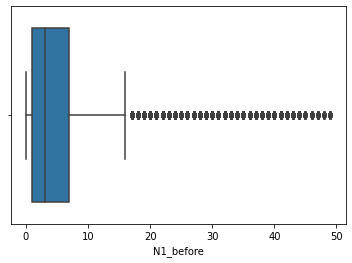

In [23]:
sns.boxplot(x='N1_before',
            data=source_code_data.loc[source_code_data['N1_before'] < 50]);

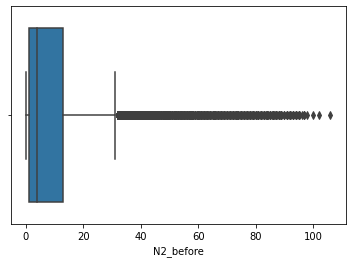

In [24]:
sns.boxplot(x='N2_before',
            data=source_code_data.loc[source_code_data['N1_before'] < 50]);

Подсчитаем отношение:

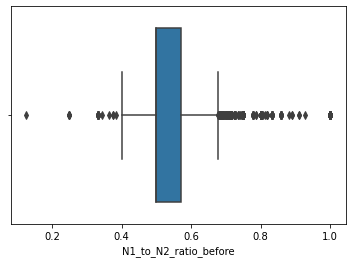

In [25]:
source_code_data['N1_to_N2_ratio_before'] = source_code_data['N1_before'] / source_code_data['N2_before']
sns.boxplot(x='N1_to_N2_ratio_before',
            data=source_code_data);

Подсчитаем некоторые статистики отношения:

In [26]:
print(f'Медиана отношения равна {source_code_data["N1_to_N2_ratio_before"].median()}.')
print(f'25-й персентиль отношения равен {source_code_data["N1_to_N2_ratio_before"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["N1_to_N2_ratio_before"].quantile(q=0.75)}.')

Медиана отношения равна 0.5.
25-й персентиль отношения равен 0.5.
75-й персентиль отношения равен 0.5714285714285714.


Таким образом, на каждый оператор у 25% сниппетов приходится в точности два операнда и у 75% сниппетов этот показатель чуть больше двух.

Теперь по исправленному коду:

In [27]:
print(f'Среднее значение N_1 равно {source_code_data["N1_after"].mean()}, а N_2 равно {source_code_data["N2_after"].mean()}.')
print(f'Медиана N_1 равна {source_code_data["N1_after"].median()}, а для N_2 равна {source_code_data["N2_after"].median()}.')
print(f'С.к.о N_1 равно {source_code_data["N1_after"].std()}, а для N_2 равно {source_code_data["N2_after"].std()}.')
print(f'25-й персентиль N_1 равен {source_code_data["N1_after"].quantile(q=0.25)}, а для N_2 равен {source_code_data["N2_after"].quantile(q=0.25)}.')
print(f'75-й персентиль N_1 равен {source_code_data["N1_after"].quantile(q=0.75)}, а для N_2 равен {source_code_data["N2_after"].quantile(q=0.75)}.')
print(f'90-й персентиль N_1 равен {source_code_data["N1_after"].quantile(q=0.90)}, а для N_2 равен {source_code_data["N2_after"].quantile(q=0.9)}.')
print(f'Минимум N_1 равен {source_code_data["N1_after"].min()}, а для N_2 равен {source_code_data["N2_after"].min()}.')
print(f'Максимум N_1 равен {source_code_data["N1_after"].max()}, а для N_2 равен {source_code_data["N2_after"].max()}')

Среднее значение N_1 равно 7.0568611618715735, а N_2 равно 13.154392078534698.
Медиана N_1 равна 3.0, а для N_2 равна 5.0.
С.к.о N_1 равно 13.522665049030811, а для N_2 равно 25.80191147010636.
25-й персентиль N_1 равен 1.0, а для N_2 равен 1.0.
75-й персентиль N_1 равен 8.0, а для N_2 равен 14.0.
90-й персентиль N_1 равен 17.0, а для N_2 равен 32.0.
Минимум N_1 равен 0, а для N_2 равен 0.
Максимум N_1 равен 426, а для N_2 равен 847


Подсчитаем отношение:

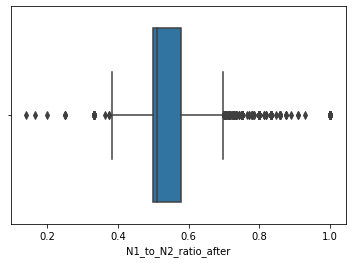

In [28]:
source_code_data['N1_to_N2_ratio_after'] = source_code_data['N1_after'] / source_code_data['N2_after']
sns.boxplot(x='N1_to_N2_ratio_after',
            data=source_code_data);

Подсчитаем некоторые статистики отношения:

In [29]:
print(f'Медиана отношения равна {source_code_data["N1_to_N2_ratio_after"].median()}.')
print(f'25-й персентиль отношения равен {source_code_data["N1_to_N2_ratio_after"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["N1_to_N2_ratio_after"].quantile(q=0.75)}.')

Медиана отношения равна 0.5104166666666666.
25-й персентиль отношения равен 0.5.
75-й персентиль отношения равен 0.5789473684210527.


Картина примерно такая же, что и по коду с ошибками.

Теперь выведем статистики по числу уникальных операторов и операндов, т.е. по метрикам $h_1$ и $h_2:$

In [30]:
print(f'Среднее значение h_1 равно {source_code_data["h1_before"].mean()}, а h_2 равно {source_code_data["h2_before"].mean()}.')
print(f'Медиана h_1 равна {source_code_data["h1_before"].median()}, а для h_2 равна {source_code_data["h2_before"].median()}.')
print(f'С.к.о h_1 равно {source_code_data["h1_before"].std()}, а для h_2 равно {source_code_data["h2_before"].std()}.')
print(f'25-й персентиль h_1 равен {source_code_data["h1_before"].quantile(q=0.25)}, а для h_2 равен {source_code_data["h2_before"].quantile(q=0.25)}.')
print(f'75-й персентиль h_1 равен {source_code_data["h1_before"].quantile(q=0.75)}, а для h_2 равен {source_code_data["h2_before"].quantile(q=0.75)}.')
print(f'90-й персентиль h_1 равен {source_code_data["h1_before"].quantile(q=0.90)}, а для h_2 равен {source_code_data["h2_before"].quantile(q=0.9)}.')
print(f'Минимум h_1 равен {source_code_data["h1_before"].min()}, а для h_2 равен {source_code_data["h2_before"].min()}.')
print(f'Максимум h_1 равен {source_code_data["h1_before"].max()}, а для h_2 равен {source_code_data["h2_before"].max()}')

Среднее значение h_1 равно 2.9059113509838084, а h_2 равно 9.481832476307849.
Медиана h_1 равна 2.0, а для h_2 равна 4.0.
С.к.о h_1 равно 3.034380750978241, а для h_2 равно 16.80766043676424.
25-й персентиль h_1 равен 1.0, а для h_2 равен 1.0.
75-й персентиль h_1 равен 4.0, а для h_2 равен 11.0.
90-й персентиль h_1 равен 7.0, а для h_2 равен 23.0.
Минимум h_1 равен 0, а для h_2 равен 0.
Максимум h_1 равен 22, а для h_2 равен 386


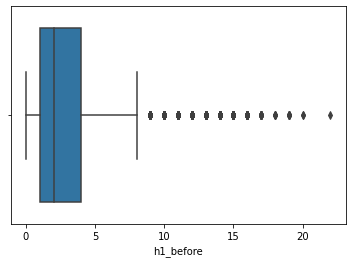

In [31]:
sns.boxplot(x='h1_before',
            data=source_code_data);

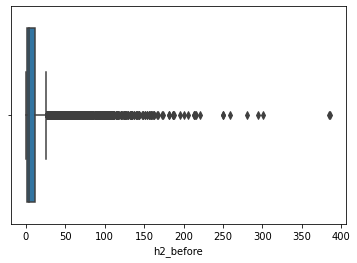

In [32]:
sns.boxplot(x='h2_before',
            data=source_code_data);

Подсчитаем отношение $h_1/h_2$

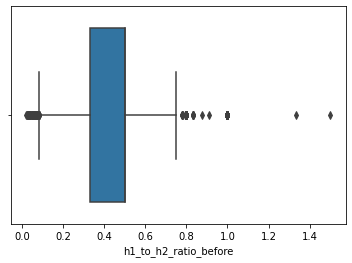

In [33]:
source_code_data['h1_to_h2_ratio_before'] = source_code_data['h1_before'] / source_code_data['h2_before']
sns.boxplot(x='h1_to_h2_ratio_before',
            data=source_code_data);

Подсчитаем некоторые статистики отношения:

In [34]:
print(f'Медиана отношения равна {source_code_data["h1_to_h2_ratio_before"].median()}.')
print(f'25-й персентиль отношения равен {source_code_data["h1_to_h2_ratio_before"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["h1_to_h2_ratio_before"].quantile(q=0.75)}.')

Медиана отношения равна 0.5.
25-й персентиль отношения равен 0.3333333333333333.
75-й персентиль отношения равен 0.5.


Таким образом, у четверти сниппетов кода с ошибками отношение $h_1/h_2=0.5,$ т.е. число различных операторов вдвое меньше числа различных операндов.

In [35]:
len(set(source_code_data.loc[source_code_data["N1_to_N2_ratio_before"] == 0.5].index) & set(source_code_data.loc[source_code_data["h1_to_h2_ratio_before"] == 0.5].index))

4301

In [36]:
len(source_code_data.loc[source_code_data["N1_to_N2_ratio_before"] == 0.5].index)

8562

In [37]:
len(source_code_data.loc[source_code_data["h1_to_h2_ratio_before"] == 0.5].index)

5326

У подавляющего большинства сниппетов кода с ошибками, у которых отношение $h_1/h_2=0.5,$ соответствующее отношение $N_1/N_2=0.5.$ Это сниппеты, у которых все проводимые в коде операции являются бинарными. Посмотрим на эти сниппеты:

In [38]:
df = source_code_data.loc[(source_code_data["h1_to_h2_ratio_before"] == 0.5) &
                          (source_code_data["N1_to_N2_ratio_before"] == 0.5)]
print(df.at[1678, 'before_merge_without_docstrings'])

    def guild(self):
        
        return self._state and self._state._get_guild(self.guild_id)


In [39]:
print(df[['h1_before', 'h2_before', 'N1_before', 'N2_before']])

        h1_before  h2_before  N1_before  N2_before
1581            2          4          2          4
1583            2          4          2          4
1644            1          2          1          2
1645            1          2          1          2
1657            3          6          3          6
...           ...        ...        ...        ...
624073          1          2          1          2
624618          2          4          2          4
625074          1          2          1          2
625235          5         10          8         16
625236          2          4          4          8

[4301 rows x 4 columns]


Посмотрим для скольки сниппетов $h_1=N_1$ и $h_2=N_2.$

In [40]:
df.loc[(df['h1_before'] == df['N1_before']) & (df['h2_before'] == df['N2_before'])].shape[0]

3941

In [41]:
df.loc[(df['h1_before'] == df['N1_before']) & (df['h2_before'] == df['N2_before'])].shape[0]

3941

Таким образом, из примерно 23.5 тысяч сниппетов кода с ошибкой примерно 4 тысячи, т.е. грубо в 16 процентах из них имеются только бинарные операции и каждая из них встречается ровно один раз.

Теперь по исправленному коду:

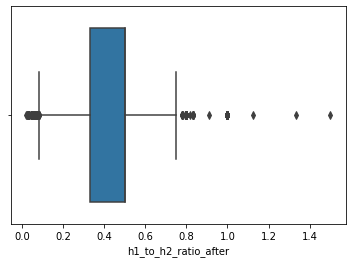

In [42]:
source_code_data['h1_to_h2_ratio_after'] = source_code_data['h1_after'] / source_code_data['h2_after']
sns.boxplot(x='h1_to_h2_ratio_after',
            data=source_code_data);

Подсчитаем статистики отношения:

In [43]:
print(f'Медиана отношения равна {source_code_data["h1_to_h2_ratio_after"].median()}.')
print(f'25-й персентиль отношения равен {source_code_data["h1_to_h2_ratio_after"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["h1_to_h2_ratio_after"].quantile(q=0.75)}.')

Медиана отношения равна 0.5.
25-й персентиль отношения равен 0.3333333333333333.
75-й персентиль отношения равен 0.5.


## Корреляции

Подсчитаем корреляции между метриками Халстеда:

In [44]:
source_code_data[['h1_before', 'h2_before', 'N1_before', 'N2_before']].corr(method='spearman')

,h1_before,h2_before,N1_before,N2_before
h1_before,1.000000,0.967740,0.967713,0.965579
h2_before,0.967740,1.000000,0.990649,0.994428
N1_before,0.967713,0.990649,1.000000,0.996109
N2_before,0.965579,0.994428,0.996109,1.000000


Видно, что метрики тесно коррелированы.

Теперь корреляции для разностей.

In [45]:
raw_Halstead_metrics_names = ["h1", "h2", "N1", "N2"]
for col_name in raw_Halstead_metrics_names:
    source_code_data[col_name + '_difference'] = source_code_data[col_name + '_after'] - source_code_data[col_name + '_before']
source_code_data[[col_name + '_difference' for col_name in raw_Halstead_metrics_names]].corr(method='pearson')

,h1_difference,h2_difference,N1_difference,N2_difference
h1_difference,1.000000,0.748570,0.691966,0.682878
h2_difference,0.748570,1.000000,0.942388,0.951697
N1_difference,0.691966,0.942388,1.000000,0.991470
N2_difference,0.682878,0.951697,0.991470,1.000000


Таким образом, разности для $N_1$ и $N_2$ связаны между собой почти линейно, разности для $N_1$ и $N_2$ тесно коррелированы с разностями для $h_2.$

Подсчитаем для скольки сниппетов метрики не меняются при внесении исправлений:

In [46]:
for col_name in raw_Halstead_metrics_names:
    print(f"""Для метрики {col_name} число сниппетов, для которых метрика не меняется при исправлении,\nравно {source_code_data.loc[source_code_data[col_name + '_difference'] == 0].shape[0]}.""")

Для метрики h1 число сниппетов, для которых метрика не меняется при исправлении,
равно 18230.
Для метрики h2 число сниппетов, для которых метрика не меняется при исправлении,
равно 16076.
Для метрики N1 число сниппетов, для которых метрика не меняется при исправлении,
равно 16122.
Для метрики N2 число сниппетов, для которых метрика не меняется при исправлении,
равно 15921.


Опять таки для по крайней мере 65 процентов сниппетов метрики не меняются.

## Производные метрики

Теперь посмотрим на производные метрики: vocabulary (сколько различных операторов и операндов), length (сколько всего операторов и операндов) и calculated_length по коду с ошибками (фактически последняя метрика это длина записи множества всех различных операторов и операндов).

In [47]:
print(f'Среднее значение vocabulary равно {source_code_data["vocabulary_before"].mean()}, для length равно {source_code_data["length_before"].mean()},\nа для calculated_length - {source_code_data["calculated_length_before"].mean()}.')
print(f'Медиана vocabulary равна {source_code_data["vocabulary_before"].median()}, для length равна {source_code_data["length_before"].median()},\nа для calculated_length - {source_code_data["calculated_length_before"].median()}.')
print(f'С.к.о vocabulary равно {source_code_data["vocabulary_before"].std()}, для length равно {source_code_data["length_before"].std()},\nа для calculated_length - {source_code_data["calculated_length_before"].std()}.')
print(f'25-й персентиль vocabulary равен {source_code_data["vocabulary_before"].quantile(q=0.25)}, для length равен {source_code_data["length_before"].quantile(q=0.25)},\nа для calculated_length - {source_code_data["calculated_length_before"].quantile(q=0.25)}.')
print(f'75-й персентиль vocabulary равен {source_code_data["vocabulary_before"].quantile(q=0.75)}, для length равен {source_code_data["length_before"].quantile(q=0.75)},\nа для calculated_length - {source_code_data["calculated_length_before"].quantile(q=0.75)}.')
print(f'90-й персентиль vocabulary равен {source_code_data["vocabulary_before"].quantile(q=0.90)}, для length равен {source_code_data["length_before"].quantile(q=0.9)},\nа для calculated_length - {source_code_data["calculated_length_before"].quantile(q=0.9)}.')
print(f'Минимум vocabulary равен {source_code_data["vocabulary_before"].min()}, для length равен {source_code_data["length_before"].min()},\nа для calculated_length - {source_code_data["calculated_length_before"].min()}.')
print(f'Максимум vocabulary равен {source_code_data["vocabulary_before"].max()}, для length равен {source_code_data["length_before"].max()},\nа для calculated_length - {source_code_data["calculated_length_before"].max()}.')

Среднее значение vocabulary равно 12.387743827291658, для length равно 19.49309421614041,
а для calculated_length - 49.35424974322345.
Медиана vocabulary равна 6.0, для length равна 8.0,
а для calculated_length - 10.0.
С.к.о vocabulary равно 19.266785392239345, для length равно 38.910644214997255,
а для calculated_length - 119.25133256242279.
25-й персентиль vocabulary равен 2.0, для length равен 2.0,
а для calculated_length - 0.0.
75-й персентиль vocabulary равен 16.0, для length равен 21.0,
а для calculated_length - 48.72905595320056.
90-й персентиль vocabulary равен 30.0, для length равен 48.0,
а для calculated_length - 124.2114326716684.
Минимум vocabulary равен 0, для length равен 0,
а для calculated_length - 0.0.
Максимум vocabulary равен 400, для length равен 1234,
а для calculated_length - 3369.991385294286.


Поскольку 25-е персентили по сырым метрикам Халстеда равны по 1, то 25-й персентиль по calculated length равен 0.

После исправления кода статистики по метрикам следующие:

In [48]:
print(f'Среднее значение vocabulary равно {source_code_data["vocabulary_after"].mean()}, для length равно {source_code_data["length_after"].mean()},\nа для calculated_length - {source_code_data["calculated_length_after"].mean()}.')
print(f'Медиана vocabulary равна {source_code_data["vocabulary_after"].median()}, для length равна {source_code_data["length_after"].median()},\nа для calculated_length - {source_code_data["calculated_length_after"].median()}.')
print(f'С.к.о vocabulary равно {source_code_data["vocabulary_after"].std()}, для length равно {source_code_data["length_after"].std()},\nа для calculated_length - {source_code_data["calculated_length_after"].std()}.')
print(f'25-й персентиль vocabulary равен {source_code_data["vocabulary_after"].quantile(q=0.25)}, для length равен {source_code_data["length_after"].quantile(q=0.25)},\nа для calculated_length - {source_code_data["calculated_length_after"].quantile(q=0.25)}.')
print(f'75-й персентиль vocabulary равен {source_code_data["vocabulary_after"].quantile(q=0.75)}, для length равен {source_code_data["length_after"].quantile(q=0.75)},\nа для calculated_length - {source_code_data["calculated_length_after"].quantile(q=0.75)}.')
print(f'90-й персентиль vocabulary равен {source_code_data["vocabulary_after"].quantile(q=0.90)}, для length равен {source_code_data["length_after"].quantile(q=0.9)},\nа для calculated_length - {source_code_data["calculated_length_after"].quantile(q=0.9)}.')
print(f'Минимум vocabulary равен {source_code_data["vocabulary_after"].min()}, для length равен {source_code_data["length_after"].min()},\nа для calculated_length - {source_code_data["calculated_length_after"].min()}.')
print(f'Максимум vocabulary равен {source_code_data["vocabulary_after"].max()}, для length равен {source_code_data["length_after"].max()},\nа для calculated_length - {source_code_data["calculated_length_after"].max()}.')

Среднее значение vocabulary равно 12.864434150694828, для length равно 20.211253240406272,
а для calculated_length - 51.344025838533454.
Медиана vocabulary равна 7.0, для length равна 8.0,
а для calculated_length - 13.60964047443681.
С.к.о vocabulary равно 19.450545945205274, для length равно 39.30307816516667,
а для calculated_length - 120.63589378976083.
25-й персентиль vocabulary равен 2.0, для length равен 2.0,
а для calculated_length - 0.0.
75-й персентиль vocabulary равен 16.0, для length равен 22.0,
а для calculated_length - 52.860603837997665.
90-й персентиль vocabulary равен 31.0, для length равен 50.0,
а для calculated_length - 129.690584471711.
Минимум vocabulary равен 0, для length равен 0,
а для calculated_length - 0.0.
Максимум vocabulary равен 406, для length равен 1273,
а для calculated_length - 3430.269227801968.


Видно, что длина сниппетов по этим метрикам также увеличивается, т.е. при исправлении добавляются новые операторы и операнды.

## Корреляции

Вначале корреляции между метриками.

In [49]:
source_code_data[['sloc_before', 'lloc_before', 'vocabulary_before', 'length_before', 'calculated_length_before']].corr(method='spearman')

,sloc_before,lloc_before,vocabulary_before,length_before,calculated_length_before
sloc_before,1.000000,0.947821,0.746319,0.751770,0.743206
lloc_before,0.947821,1.000000,0.782736,0.788468,0.778791
vocabulary_before,0.746319,0.782736,1.000000,0.993542,0.996264
length_before,0.751770,0.788468,0.993542,1.000000,0.989967
calculated_length_before,0.743206,0.778791,0.996264,0.989967,1.000000


Как видно, производные метрики Халстеда между собой тесно коррелированы. Также есть достаточно большая корреляция с длиной кода в строках и числом утверждений.

Теперь корреляции между разностями метрик до и после исправления:

In [50]:
metrics_names = ["vocabulary", "length", "calculated_length", "sloc", "lloc"]
for col_name in metrics_names:
    source_code_data[col_name + '_difference'] = source_code_data[col_name + '_after'] - source_code_data[col_name + '_before']
source_code_data[[col_name + '_difference' for col_name in metrics_names]].corr(method='pearson')

,vocabulary_difference,length_difference,calculated_length_difference,sloc_difference,lloc_difference
vocabulary_difference,1.000000,0.932078,0.944016,0.591118,0.619039
length_difference,0.932078,1.000000,0.943807,0.605855,0.636067
calculated_length_difference,0.944016,0.943807,1.000000,0.576714,0.598982
sloc_difference,0.591118,0.605855,0.576714,1.000000,0.921453
lloc_difference,0.619039,0.636067,0.598982,0.921453,1.000000


Разности метрик Халстеда между собой также сильно коррелированы.

Подсчитаем для скольки сниппетов метрики не изменяются:

In [51]:
for col_name in ["vocabulary", "length", "calculated_length"]:
    print(f"""Для метрики {col_name} число сниппетов, для которых метрика не меняется при исправлении,\nравно {source_code_data.loc[source_code_data[col_name + '_difference'] == 0].shape[0]}.""")

Для метрики vocabulary число сниппетов, для которых метрика не меняется при исправлении,
равно 15934.
Для метрики length число сниппетов, для которых метрика не меняется при исправлении,
равно 15911.
Для метрики calculated_length число сниппетов, для которых метрика не меняется при исправлении,
равно 16128.


Опять таки для более половины сниппетов метрики не изменяются.

## Метрики Халстеда сложности кода

Посмотрим теперь на метрики сложности кода. Это метрики bugs, difficulty, volume, effort и time. Подсчитаем их статистики по коду с ошибками:

In [52]:
print(f'Среднее значение bugs равно {source_code_data["bugs_before"].mean()}, для difficulty равно {source_code_data["difficulty_before"].mean()}.')
print(f'Медиана bugs равна {source_code_data["bugs_before"].median()}, для difficulty равна {source_code_data["difficulty_before"].median()}.')
print(f'С.к.о bugs равно {source_code_data["bugs_before"].std()}, для difficulty равно {source_code_data["difficulty_before"].std()}.')
print(f'25-й персентиль bugs равен {source_code_data["bugs_before"].quantile(q=0.25)}, для difficulty равен {source_code_data["difficulty_before"].quantile(q=0.25)}.')
print(f'75-й персентиль bugs равен {source_code_data["bugs_before"].quantile(q=0.75)}, для difficulty равен {source_code_data["difficulty_before"].quantile(q=0.75)}.')
print(f'90-й персентиль bugs равен {source_code_data["bugs_before"].quantile(q=0.90)}, для difficulty равен {source_code_data["difficulty_before"].quantile(q=0.9)}.')
print(f'Минимум bugs равен {source_code_data["bugs_before"].min()}, для difficulty равен {source_code_data["difficulty_before"].min()}.')
print(f'Максимум bugs равен {source_code_data["bugs_before"].max()}, для difficulty равен {source_code_data["difficulty_before"].max()}.')

Среднее значение bugs равно 0.032436247040134376, для difficulty равно 1.8851344824752498.
Медиана bugs равна 0.00655049481813441, для difficulty равна 1.0.
С.к.о bugs равно 0.08856282856376206, для difficulty равно 2.274961442773167.
25-й персентиль bugs равен 0.0006666666666666666, для difficulty равен 0.5.
75-й персентиль bugs равен 0.028, для difficulty равен 2.727272727272727.
90-й персентиль bugs равен 0.0785102495297363, для difficulty равен 4.842105263157895.
Минимум bugs равен 0.0, для difficulty равен 0.0.
Максимум bugs равен 3.400404863739169, для difficulty равен 22.285714285714285.


Теперь для сниппетов после исправления:

In [53]:
print(f'Среднее значение bugs равно {source_code_data["bugs_after"].mean()}, для difficulty равно {source_code_data["difficulty_after"].mean()}.')
print(f'Медиана bugs равна {source_code_data["bugs_after"].median()}, для difficulty равна {source_code_data["difficulty_after"].median()}.')
print(f'С.к.о bugs равно {source_code_data["bugs_after"].std()}, для difficulty равно {source_code_data["difficulty_after"].std()}.')
print(f'25-й персентиль bugs равен {source_code_data["bugs_after"].quantile(q=0.25)}, для difficulty равен {source_code_data["difficulty_after"].quantile(q=0.25)}.')
print(f'75-й персентиль bugs равен {source_code_data["bugs_after"].quantile(q=0.75)}, для difficulty равен {source_code_data["difficulty_after"].quantile(q=0.75)}.')
print(f'90-й персентиль bugs равен {source_code_data["bugs_after"].quantile(q=0.90)}, для difficulty равен {source_code_data["difficulty_after"].quantile(q=0.9)}.')
print(f'Минимум bugs равен {source_code_data["bugs_after"].min()}, для difficulty равен {source_code_data["difficulty_after"].min()}.')
print(f'Максимум bugs равен {source_code_data["bugs_after"].max()}, для difficulty равен {source_code_data["difficulty_after"].max()}.')

Среднее значение bugs равно 0.03365547782630188, для difficulty равно 1.9625813823522842.
Медиана bugs равна 0.008, для difficulty равна 1.1818181818181819.
С.к.о bugs равно 0.08968245059227735, для difficulty равно 2.2979702634545656.
25-й персентиль bugs равен 0.0006666666666666666, для difficulty равен 0.5.
75-й персентиль bugs равен 0.029735492594105097, для difficulty равен 2.8125.
90-й персентиль bugs равен 0.08166666666666667, для difficulty равен 5.0.
Минимум bugs равен 0.0, для difficulty равен 0.0.
Максимум bugs равен 3.5445186362863534, для difficulty равен 22.727272727272727.


Видно, что bugs отражает скорее не ошибочность кода, а сложность кода, которая незначительно растет при исправлениях. Среднее значение bugs примерно равно 75-му персентилю, т.е. для метрики bugs есть много больших выбросов.

Теперь подсчитаем статистики по оставшимся трем метрикам, рассчитанным по коду с ошибками:

In [54]:
print(f'Среднее значение volume равно {source_code_data["volume_before"].mean()}, для effort равно {source_code_data["effort_before"].mean()},\nа для time - {source_code_data["time_before"].mean()}.')
print(f'Медиана volume равна {source_code_data["volume_before"].median()}, для effort равна {source_code_data["effort_before"].median()},\nа для time - {source_code_data["time_before"].median()}.')
print(f'С.к.о volume равно {source_code_data["volume_before"].std()}, для effort равно {source_code_data["effort_before"].std()},\nа для time - {source_code_data["time_before"].std()}.')
print(f'25-й персентиль volume равен {source_code_data["volume_before"].quantile(q=0.25)}, для effort равен {source_code_data["effort_before"].quantile(q=0.25)},\nа для time - {source_code_data["time_before"].quantile(q=0.25)}.')
print(f'75-й персентиль volume равен {source_code_data["volume_before"].quantile(q=0.75)}, для effort равен {source_code_data["effort_before"].quantile(q=0.75)},\nа для time - {source_code_data["time_before"].quantile(q=0.75)}.')
print(f'90-й персентиль volume равен {source_code_data["volume_before"].quantile(q=0.90)}, для effort равен {source_code_data["effort_before"].quantile(q=0.9)},\nа для time - {source_code_data["time_before"].quantile(q=0.9)}.')
print(f'Минимум volume равен {source_code_data["volume_before"].min()}, для effort равен {source_code_data["effort_before"].min()},\nа для time - {source_code_data["time_before"].min()}.')
print(f'Максимум volume равен {source_code_data["volume_before"].max()}, для effort равен {source_code_data["effort_before"].max()},\nа для time - {source_code_data["time_before"].max()}.')

Среднее значение volume равно 97.30874112040313, для effort равно 611.6100040838255,
а для time - 33.97833356021252.
Медиана volume равна 19.651484454403228, для effort равна 19.019550008653876,
а для time - 1.0566416671474377.
С.к.о volume равно 265.6884856912862, для effort равно 2964.688682372275,
а для time - 164.7049267984597.
25-й персентиль volume равен 2.0, для effort равен 1.0,
а для time - 0.05555555555555555.
75-й персентиль volume равен 84.0, для effort равен 224.30769230769232,
а для time - 12.461538461538462.
90-й персентиль volume равен 235.53074858920888, для effort равен 1086.3238459703857,
а для time - 60.35132477613254.
Минимум volume равен 0.0, для effort равен 0.0,
а для time - 0.0.
Максимум volume равен 10201.214591217507, для effort равен 199409.4566521327,
а для time - 11078.303147340706.


Средние значения всех трех метрик заметно больше, чем 75-й персентиль, т.е. в данных присутствует много больших выбросов по этим метрикам.

Подсчитаем процент выбросов по этим метрикам (вне non-outlier range в большую сторону).

In [55]:
advanced_Halstead_metrics_names = ['volume', 'effort', 'time']

for col_name in advanced_Halstead_metrics_names:
    inter_quartile_range = source_code_data[col_name + '_before'].quantile(q=0.75) - source_code_data[col_name + '_before'].quantile(q=0.25)
    outlier_count = source_code_data.loc[source_code_data[col_name + '_before'] > source_code_data[col_name + '_before'].quantile(q=0.75) + 1.5 * inter_quartile_range].shape[0]
    print(f'Процент выбросов по метрике {col_name} равен {100 * outlier_count / source_code_data.shape[0]}')

Процент выбросов по метрике volume равен 11.278738685138753
Процент выбросов по метрике effort равен 15.719688920997832
Процент выбросов по метрике time равен 15.719688920997832


Таким образом, код сниппетов с ошибками на 15% состоит из достаточно сложного кода. Посмотрим на код выбросов:

In [56]:
effort_inter_quartile_range = source_code_data['effort_before'].quantile(q=0.75) - source_code_data['effort_before'].quantile(q=0.25)
print(source_code_data.loc[source_code_data['effort_before'] > source_code_data['effort_before'].quantile(q=0.75) + 1.5 * effort_inter_quartile_range].loc[0, 'before_merge_without_docstrings'])

def rescale(image, scale, order=None, mode='reflect', cval=0, clip=True,
            preserve_range=False, multichannel=False,
            anti_aliasing=None, anti_aliasing_sigma=None):
    
    scale = np.atleast_1d(scale)
    if len(scale) > 1:
        if ((not multichannel and len(scale) != image.ndim) or
                (multichannel and len(scale) != image.ndim - 1)):
            raise ValueError("Supply a single scale, or one value per spatial "
                             "axis")
        if multichannel:
            scale = np.concatenate((scale, [1]))
    orig_shape = np.asarray(image.shape)
    output_shape = np.round(scale * orig_shape)
    if multichannel:  
        output_shape[-1] = orig_shape[-1]

    return resize(image, output_shape, order=order, mode=mode, cval=cval,
                  clip=clip, preserve_range=preserve_range,
                  anti_aliasing=anti_aliasing,
                  anti_aliasing_sigma=anti_aliasing_sigma)


Таким образом, 85% сниппетов кода имеют невысокую сложность.

Теперь посмотрим на статистики метрик после исправления кода:

In [57]:
print(f'Среднее значение volume равно {source_code_data["volume_after"].mean()}, для effort равно {source_code_data["effort_after"].mean()},\nа для time - {source_code_data["time_after"].mean()}.')
print(f'Медиана volume равна {source_code_data["volume_after"].median()}, для effort равна {source_code_data["effort_after"].median()},\nа для time - {source_code_data["time_after"].median()}.')
print(f'С.к.о volume равно {source_code_data["volume_after"].std()}, для effort равно {source_code_data["effort_after"].std()},\nа для time - {source_code_data["time_after"].std()}.')
print(f'25-й персентиль volume равен {source_code_data["volume_after"].quantile(q=0.25)}, для effort равен {source_code_data["effort_after"].quantile(q=0.25)},\nа для time - {source_code_data["time_after"].quantile(q=0.25)}.')
print(f'75-й персентиль volume равен {source_code_data["volume_after"].quantile(q=0.75)}, для effort равен {source_code_data["effort_after"].quantile(q=0.75)},\nа для time - {source_code_data["time_after"].quantile(q=0.75)}.')
print(f'90-й персентиль volume равен {source_code_data["volume_after"].quantile(q=0.90)}, для effort равен {source_code_data["effort_after"].quantile(q=0.9)},\nа для time - {source_code_data["time_after"].quantile(q=0.9)}.')
print(f'Минимум volume равен {source_code_data["volume_after"].min()}, для effort равен {source_code_data["effort_after"].min()},\nа для time - {source_code_data["time_after"].min()}.')
print(f'Максимум volume равен {source_code_data["volume_after"].max()}, для effort равен {source_code_data["effort_after"].max()},\nа для time - {source_code_data["time_after"].max()}.')

Среднее значение volume равно 100.96643347890563, для effort равно 635.1873291113897,
а для time - 35.28818495063276.
Медиана volume равна 24.0, для effort равна 29.47722668160484,
а для time - 1.6376237045336022.
С.к.о volume равно 269.04735177683204, для effort равно 3015.820431291427,
а для time - 167.5455795161904.
25-й персентиль volume равен 2.0, для effort равен 1.0,
а для time - 0.05555555555555555.
75-й персентиль volume равен 89.20647778231529, для effort равен 250.3570990265833,
а для time - 13.908727723699073.
90-й персентиль volume равен 245.0, для effort равен 1165.3865164570232,
а для time - 64.74369535872351.
Минимум volume равен 0.0, для effort равен 0.0,
а для time - 0.0.
Максимум volume равен 10633.55590885906, для effort равен 201426.04787100755,
а для time - 11190.335992833752.


Видно, что сложность кода растет после исправления.

## Корреляции

Вначале корреляции между метриками.

In [58]:
source_code_data[['bugs_before', 'difficulty_before', 'volume_before', 'effort_before', 'time_before', 'sloc_before', 'lloc_before']].corr(method='spearman')

,bugs_before,difficulty_before,volume_before,effort_before,time_before,sloc_before,lloc_before
bugs_before,1.000000,0.974996,1.000000,0.996449,0.996449,0.751033,0.787684
difficulty_before,0.974996,1.000000,0.974996,0.989455,0.989455,0.730645,0.770821
volume_before,1.000000,0.974996,1.000000,0.996449,0.996449,0.751033,0.787684
effort_before,0.996449,0.989455,0.996449,1.000000,1.000000,0.747950,0.785984
time_before,0.996449,0.989455,0.996449,1.000000,1.000000,0.747950,0.785984
sloc_before,0.751033,0.730645,0.751033,0.747950,0.747950,1.000000,0.947821
lloc_before,0.787684,0.770821,0.787684,0.785984,0.785984,0.947821,1.000000


Как видно, производные метрики Халстеда между собой тесно коррелированы. Также есть достаточно большая корреляция с длиной кода в строках и числом утверждений.

Теперь корреляции между разностями метрик до и после исправления:

In [59]:
metrics_names = ['bugs', 'difficulty', 'volume', 'effort', 'time', 'sloc', 'lloc']
for col_name in metrics_names:
    source_code_data[col_name + '_difference'] = source_code_data[col_name + '_after'] - source_code_data[col_name + '_before']
source_code_data[[col_name + '_difference' for col_name in metrics_names]].corr(method='pearson')

,bugs_difference,difficulty_difference,volume_difference,effort_difference,time_difference,sloc_difference,lloc_difference
bugs_difference,1.000000,0.641218,1.000000,0.852149,0.852149,0.572990,0.598805
difficulty_difference,0.641218,1.000000,0.641218,0.538672,0.538672,0.496720,0.539496
volume_difference,1.000000,0.641218,1.000000,0.852149,0.852149,0.572990,0.598805
effort_difference,0.852149,0.538672,0.852149,1.000000,1.000000,0.446431,0.477928
time_difference,0.852149,0.538672,0.852149,1.000000,1.000000,0.446431,0.477928
sloc_difference,0.572990,0.496720,0.572990,0.446431,0.446431,1.000000,0.921453
lloc_difference,0.598805,0.539496,0.598805,0.477928,0.477928,0.921453,1.000000


Разности метрик bugs, effort, volume и time сильно коррелированы. Bugs и volume функционально зависимы.

Подсчитаем для скольки сниппетов метрики не изменяются:

In [60]:
for col_name in ['bugs', 'difficulty', 'volume', 'effort', 'time']:
    print(f"""Для метрики {col_name} число сниппетов, для которых метрика не меняется при исправлении,\nравно {source_code_data.loc[source_code_data[col_name + '_difference'] == 0].shape[0]}.""")

Для метрики bugs число сниппетов, для которых метрика не меняется при исправлении,
равно 15678.
Для метрики difficulty число сниппетов, для которых метрика не меняется при исправлении,
равно 16084.
Для метрики volume число сниппетов, для которых метрика не меняется при исправлении,
равно 15678.
Для метрики effort число сниппетов, для которых метрика не меняется при исправлении,
равно 15671.
Для метрики time число сниппетов, для которых метрика не меняется при исправлении,
равно 15671.


Опять таки для более половины сниппетов метрики не изменяются.

# Цикломатическая сложность и индекс исправляемости кода

Теперь подсчитаем статистики метрики цикломатической сложности (cc) и метрики исправляемости кода (MI) по коду с ошибками.
Цикломатическая сложность - число линейно независимых маршрутов через код. Если в коде имеется один оператор if, то имеется два таких маршрута. Нужно для вычисления покрываемости тестами. Имеется следующая дискретизация значений:

1 - 5	A (low risk - simple block)

6 - 10	B (low risk - well structured and stable block)

11 - 20	C (moderate risk - slightly complex block)

21 - 30	D (more than moderate risk - more complex block)

31 - 40	E (high risk - complex block, alarming)

41+	F (very high risk - error-prone, unstable block)

In [61]:
print(f'Среднее значение cc равно {source_code_data["cc_before"].mean()}.')
print(f'Медиана cc равна {source_code_data["cc_before"].median()}.')
print(f'С.к.о cc равно {source_code_data["cc_before"].std()}.')
print(f'25-й персентиль cc равен {source_code_data["cc_before"].quantile(q=0.25)}.')
print(f'75-й персентиль cc равен {source_code_data["cc_before"].quantile(q=0.75)}.')
print(f'90-й персентиль cc равен {source_code_data["cc_before"].quantile(q=0.90)}.')
print(f'Минимум cc равен {source_code_data["cc_before"].min()}.')
print(f'Максимум cc равен {source_code_data["cc_before"].max()}.')

Среднее значение cc равно 7.016701372657345.
Медиана cc равна 3.0.
С.к.о cc равно 12.13252441133371.
25-й персентиль cc равен 1.0.
75-й персентиль cc равен 8.0.
90-й персентиль cc равен 16.0.
Минимум cc равен 0.
Максимум cc равен 199.


Таким образом, 50% сниппетов имеют низкую сложность, т.е. очень простую структуру, 25% имеют хорошую структуру невысокой сложности, 15% - имеют структуру средней сложности. Лишь среди оставшихся 10% есть сниппеты с высокой сложностью структуры.

Построим диаграмму частот для дискретизации, описанной выше.

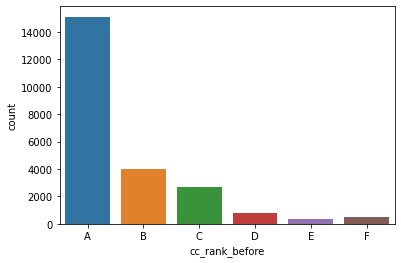

In [62]:
ax = sns.countplot(x='cc_rank_before',
                   data=source_code_data,
                   order=np.sort(source_code_data['cc_rank_before'].unique()));

Теперь по коду после исправления. 

In [63]:
print(f'Среднее значение cc равно {source_code_data["cc_after"].mean()}.')
print(f'Медиана cc равна {source_code_data["cc_after"].median()}.')
print(f'С.к.о cc равно {source_code_data["cc_after"].std()}.')
print(f'25-й персентиль cc равен {source_code_data["cc_after"].quantile(q=0.25)}.')
print(f'75-й персентиль cc равен {source_code_data["cc_after"].quantile(q=0.75)}.')
print(f'90-й персентиль cc равен {source_code_data["cc_after"].quantile(q=0.90)}.')
print(f'Минимум cc равен {source_code_data["cc_after"].min()}.')
print(f'Максимум cc равен {source_code_data["cc_after"].max()}.')

Среднее значение cc равно 7.368067655433258.
Медиана cc равна 4.0.
С.к.о cc равно 12.307107821660175.
25-й персентиль cc равен 1.0.
75-й персентиль cc равен 9.0.
90-й персентиль cc равен 17.0.
Минимум cc равен 0.
Максимум cc равен 199.


После исправления цикломатическая сложность немного увеличивается, т.е. добавляются дополнительные ветвления в код.

Теперь тоже самое для индекса исправляемости кода, который служит для оценки масштабируемости, поддерживаемости и улучшаемости кода:

In [64]:
print(f'Среднее значение MI равно {source_code_data["MI_before"].mean()}.')
print(f'Медиана MI равна {source_code_data["MI_before"].median()}.')
print(f'С.к.о MI равно {source_code_data["MI_before"].std()}.')
print(f'25-й персентиль MI равен {source_code_data["MI_before"].quantile(q=0.25)}.')
print(f'75-й персентиль MI равен {source_code_data["MI_before"].quantile(q=0.75)}.')
print(f'90-й персентиль MI равен {source_code_data["MI_before"].quantile(q=0.90)}.')
print(f'Минимум MI равен {source_code_data["MI_before"].min()}.')
print(f'Максимум MI равен {source_code_data["MI_before"].max()}.')

Среднее значение MI равно 77.70882974345216.
Медиана MI равна 76.35858132710041.
С.к.о MI равно 17.349316100549874.
25-й персентиль MI равен 64.92969693662572.
75-й персентиль MI равен 100.0.
90-й персентиль MI равен 100.0.
Минимум MI равен 0.0.
Максимум MI равен 100.0.


Теперь тоже самое по индексу исправляемости:

In [65]:
print(f'Среднее значение MI равно {source_code_data["MI_after"].mean()}.')
print(f'Медиана MI равна {source_code_data["MI_after"].median()}.')
print(f'С.к.о MI равно {source_code_data["MI_after"].std()}.')
print(f'25-й персентиль MI равен {source_code_data["MI_after"].quantile(q=0.25)}.')
print(f'75-й персентиль MI равен {source_code_data["MI_after"].quantile(q=0.75)}.')
print(f'90-й персентиль MI равен {source_code_data["MI_after"].quantile(q=0.90)}.')
print(f'Минимум MI равен {source_code_data["MI_after"].min()}.')
print(f'Максимум MI равен {source_code_data["MI_after"].max()}.')

Среднее значение MI равно 77.32017554843219.
Медиана MI равна 75.88591420814735.
С.к.о MI равно 17.251378324840804.
25-й персентиль MI равен 64.73237237424682.
75-й персентиль MI равен 96.41031161995804.
90-й персентиль MI равен 100.0.
Минимум MI равен 0.0.
Максимум MI равен 100.0.


Индекс исправляемости, в отличие от остальных метрик, немного уменьшается.

## Корреляции

Вначале корреляции между метриками.

In [66]:
source_code_data[['cc_before', 'MI_before']].corr(method='spearman')

,cc_before,MI_before
cc_before,1.000000,-0.729337
MI_before,-0.729337,1.000000


Как видно, эти метрики между собой достаточно тесно коррелированы. 

Теперь корреляции между разностями метрик до и после исправления:

In [67]:
metrics_names = ['cc', 'MI']
for col_name in metrics_names:
    source_code_data[col_name + '_difference'] = source_code_data[col_name + '_after'] - source_code_data[col_name + '_before']
source_code_data[[col_name + '_difference' for col_name in metrics_names]].corr(method='pearson')

,cc_difference,MI_difference
cc_difference,1.000000,-0.372533
MI_difference,-0.372533,1.000000


Видно, что размеры разностей метрик не очень сильно коррелированы.

Подсчитаем для скольки сниппетов метрики не изменяются:

In [68]:
for col_name in metrics_names:
    print(f"""Для метрики {col_name} число сниппетов, для которых метрика не меняется при исправлении,\nравно {source_code_data.loc[source_code_data[col_name + '_difference'] == 0].shape[0]}.""")

Для метрики cc число сниппетов, для которых метрика не меняется при исправлении,
равно 14493.
Для метрики MI число сниппетов, для которых метрика не меняется при исправлении,
равно 10540.


Опять таки для достаточного количества сниппетов метрики не изменяются.

# Сравнение метрик на обучающем, валидационном и тестовом датасетах

In [69]:
source_code_data_train = pd.read_pickle(path_to_data + 'filtered_traceback_bugfixes_train_metrics.pickle')
source_code_data_valid = pd.read_pickle(path_to_data + 'filtered_traceback_bugfixes_valid_metrics.pickle')
source_code_data_test = pd.read_pickle(path_to_data + 'bugfixes_test_metrics.pickle')

In [70]:
all_source_code_data = pd.concat((source_code_data_train,
                                  source_code_data_valid,
                                  source_code_data_test), axis=0)
all_source_code_data['sample_index'] = np.array((['train'] * source_code_data_train.shape[0] + 
                                                 ['valid'] * source_code_data_valid.shape[0] +
                                                 ['test'] * source_code_data_test.shape[0]))

In [71]:
metrics_names = ['cc', 'N1', 'N2',
       'bugs', 'calculated_length', 'difficulty', 
       'effort', 'h1', 'h2', 'length', 'time',
       'vocabulary', 'volume', 'blank', 'single_comments',
       'lloc', 'loc', 'multi', 'sloc', 'MI']

# Функция оценки множественной статистической значимости различий выборок

In [72]:
from scipy.stats import kruskal, ks_2samp, mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [73]:
def significantFeatures(data_samples, 
                        features, 
                        test_function,
                        test_key_params={},
                        remove_outliers=False,
                        confidence_level=0.05):
    p_values = []
    for feature_name in features:
        p_values.append(test_function(*[data_sample[feature_name] for data_sample in data_samples],
                                          **test_key_params)[1])
    is_feature_predictive, features_p_values_corrected, _, _ = multipletests(p_values, 
                                                                             alpha=confidence_level,
                                                                             method='fdr_bh',
                                                                             returnsorted=False)
    return [feature_name for i, feature_name in enumerate(features) if is_feature_predictive[i]], features_p_values_corrected

Применим для оценки статистической значимости отличий по метрикам статистический критерий Краскла-Уоллиса для трех независимых выборок.

In [74]:
kw_predictive_metrics_names, kw_p_values = significantFeatures([source_code_data_train,
                                                                source_code_data_valid,
                                                                source_code_data_test],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=kruskal,
                                                               confidence_level=0.05)

In [75]:
for feature, p_value in zip(kw_predictive_metrics_names, kw_p_values):
    print(feature, p_value)

cc_before 4.852411452954489e-39
N1_before 2.564656697313809e-14
N2_before 7.419477829113087e-13
bugs_before 3.0822029971685255e-13
calculated_length_before 5.669290674778297e-13
difficulty_before 1.5191072778898336e-12
effort_before 4.704296459466576e-13
h1_before 9.341937506018657e-14
h2_before 9.341937506018657e-14
length_before 3.4792041341223424e-13
time_before 4.704296459466576e-13
vocabulary_before 9.362258065172563e-14
volume_before 3.0822029971685255e-13
blank_before 1.8707345542077798e-57
single_comments_before 0.00012947924820444484
lloc_before 2.9751502935946488e-36
loc_before 2.6114405527436317e-44
multi_before 1.994296061863733e-68
sloc_before 3.0306663104791817e-28
MI_before 1.2958795670381996e-34


Теперь оценим значимость попарных различий:

In [76]:
mw_predictive_metrics_names, mw_p_values = significantFeatures([source_code_data_train,
                                                                source_code_data_valid],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=mannwhitneyu)

In [77]:
for metric_name, p_value in zip(mw_predictive_metrics_names, mw_p_values):
    print(metric_name, p_value)

cc_before 4.11154211281312e-39
N1_before 2.4013026293780562e-14
N2_before 5.002275457102952e-13
bugs_before 1.8914675681149024e-13
calculated_length_before 2.522703876510571e-13
difficulty_before 9.699154956622364e-13
effort_before 2.747280962709461e-13
h1_before 4.7430461845641086e-14
h2_before 4.7430461845641086e-14
length_before 2.522703876510571e-13
time_before 2.747280962709461e-13
vocabulary_before 4.8021057167574755e-14
volume_before 1.8914675681149024e-13
blank_before 2.307051193888733e-58
single_comments_before 1.326604727393077e-05
lloc_before 9.229870722232673e-37
loc_before 4.717763128187861e-45
multi_before 5.176178495970753e-70
sloc_before 4.652523275571716e-29
MI_before 1.8119986341538447e-34


In [78]:
mw_predictive_metrics_names, mw_p_values = significantFeatures([source_code_data_train,
                                                                source_code_data_test],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=mannwhitneyu)

In [79]:
for metric_name, p_value in zip(mw_predictive_metrics_names, mw_p_values):
    print(metric_name, p_value)

cc_before 0.0024783552111471213
N1_before 0.0050988207706926855
N2_before 0.0050988207706926855
bugs_before 0.0050988207706926855
calculated_length_before 0.007186944456878514
difficulty_before 0.0050988207706926855
effort_before 0.0050988207706926855
h1_before 0.005195599209829036
h2_before 0.0050988207706926855
length_before 0.0050988207706926855
time_before 0.0050988207706926855
vocabulary_before 0.005195599209829036
volume_before 0.0050988207706926855
blank_before 0.0050988207706926855
lloc_before 0.2153320405941015
loc_before 0.0050988207706926855
multi_before 0.0050988207706926855
sloc_before 0.02814888344313921
MI_before 0.007186944456878514


In [80]:
mw_predictive_metrics_names, mw_p_values = significantFeatures([source_code_data_valid,
                                                                source_code_data_test],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=mannwhitneyu)

In [128]:
for metric_name, p_value in zip(mw_predictive_metrics_names, mw_p_values):
    print(metric_name, p_value)

Таким образом, разница между обучающей и валидационной, а также между обучающей и тестовой выборками статистически значима, но разница между валидационной и тестовой - незначима. Это происходит потому, что валидационная и тестовая выборки содержат код из одних и тех же репозиториев.

Видно, что по всем метрикам выборки отличаются. Посмотрим на размер этих отличий с помощью графиков. Вначале для цикломатической сложности.

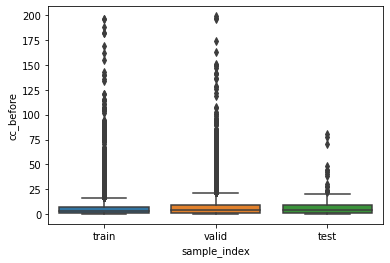

In [82]:
sns.boxplot(x='sample_index', y='cc_before',
            data=all_source_code_data);

Уберем выбросы:

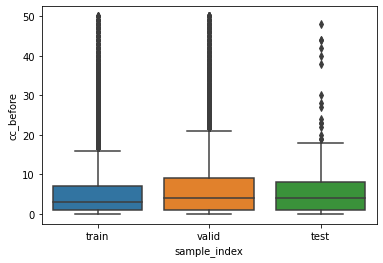

In [83]:
sns.boxplot(x='sample_index', y='cc_before',
            data=all_source_code_data.loc[all_source_code_data['cc_before'] <= 50]);

Теперь для $N_1,$ числа операторов:

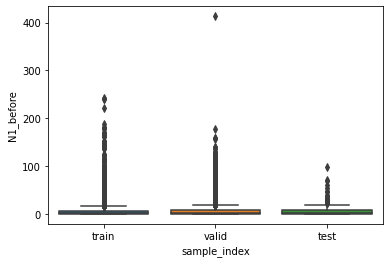

In [84]:
sns.boxplot(x='sample_index', y='N1_before',
            data=all_source_code_data);

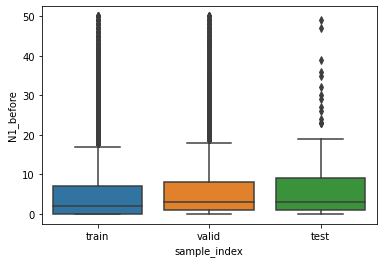

In [85]:
sns.boxplot(x='sample_index', y='N1_before',
            data=all_source_code_data.loc[all_source_code_data['N1_before'] <= 50]);

Теперь для числа операндов $N_2:$

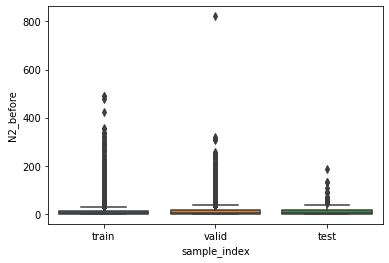

In [86]:
sns.boxplot(x='sample_index', y='N2_before',
            data=all_source_code_data);

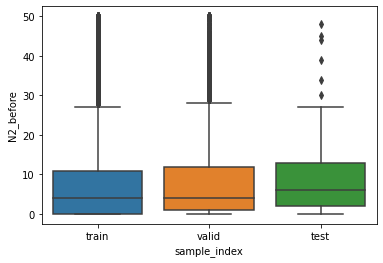

In [87]:
sns.boxplot(x='sample_index', y='N2_before',
            data=all_source_code_data.loc[all_source_code_data['N2_before'] <= 50]);

Теперь для числа уникальных операторов $h_1:$

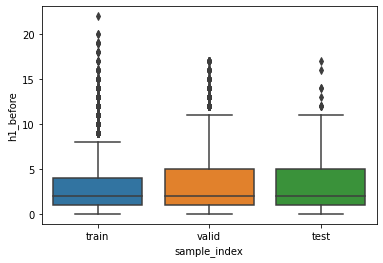

In [88]:
sns.boxplot(x='sample_index', y='h1_before',
            data=all_source_code_data);

Теперь для числа уникальных операндов $h_2:$

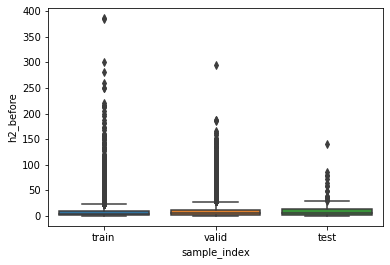

In [89]:
sns.boxplot(x='sample_index', y='h2_before',
            data=all_source_code_data);

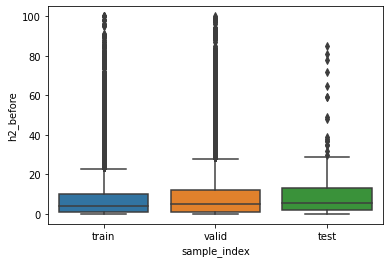

In [90]:
sns.boxplot(x='sample_index', y='h2_before',
            data=all_source_code_data.loc[all_source_code_data['h2_before'] <= 100]);

Теперь для vocabulary, length и calculated_length:

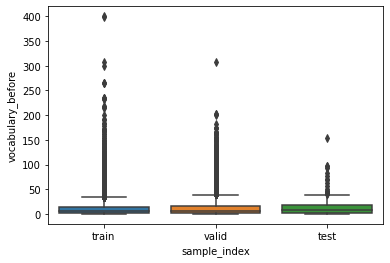

In [91]:
sns.boxplot(x='sample_index', y='vocabulary_before',
            data=all_source_code_data);

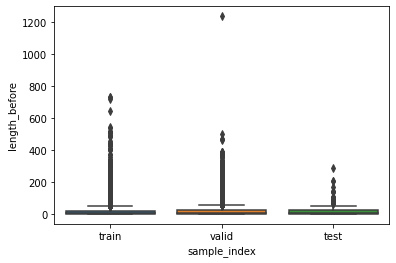

In [92]:
sns.boxplot(x='sample_index', y='length_before',
            data=all_source_code_data);

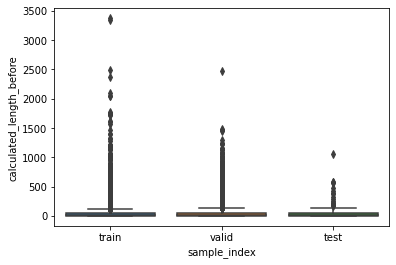

In [93]:
sns.boxplot(x='sample_index', y='calculated_length_before',
            data=all_source_code_data);

После удаления выбросов:

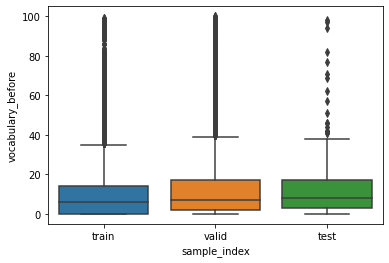

In [94]:
sns.boxplot(x='sample_index', y='vocabulary_before',
            data=all_source_code_data.loc[all_source_code_data['vocabulary_before'] <= 100]);

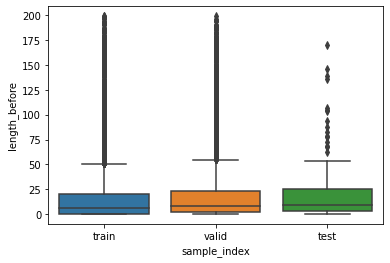

In [95]:
sns.boxplot(x='sample_index', y='length_before',
            data=all_source_code_data.loc[all_source_code_data['length_before'] <= 200]);

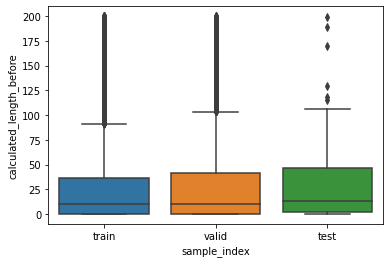

In [96]:
sns.boxplot(x='sample_index', y='calculated_length_before',
            data=all_source_code_data.loc[all_source_code_data['calculated_length_before'] <= 200]);

Теперь для bugs, difficulty, effort, volume и time:

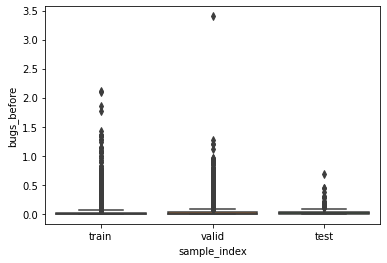

In [97]:
sns.boxplot(x='sample_index', y='bugs_before',
            data=all_source_code_data);

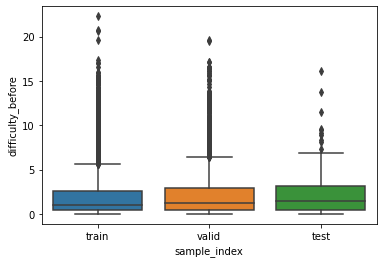

In [98]:
sns.boxplot(x='sample_index', y='difficulty_before',
            data=all_source_code_data);

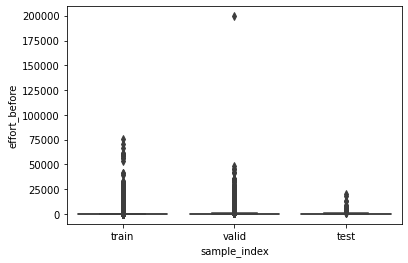

In [99]:
sns.boxplot(x='sample_index', y='effort_before',
            data=all_source_code_data);

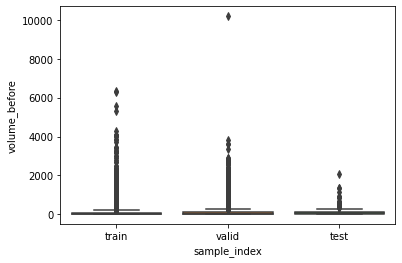

In [100]:
sns.boxplot(x='sample_index', y='volume_before',
            data=all_source_code_data);

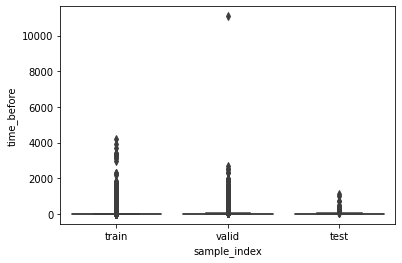

In [101]:
sns.boxplot(x='sample_index', y='time_before',
            data=all_source_code_data);

Теперь удалим выбросы:

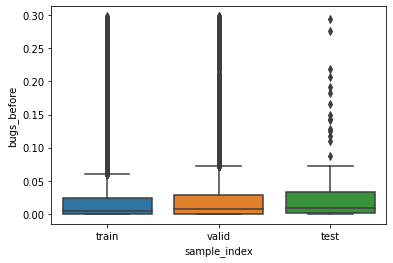

In [102]:
sns.boxplot(x='sample_index', y='bugs_before',
            data=all_source_code_data.loc[all_source_code_data['bugs_before'] <= 0.3]);

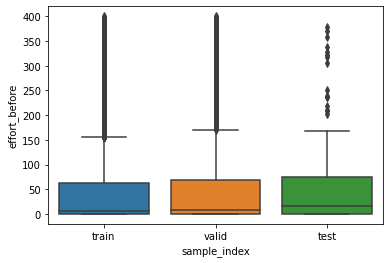

In [103]:
sns.boxplot(x='sample_index', y='effort_before',
            data=all_source_code_data.loc[all_source_code_data['effort_before'] <= 400]);

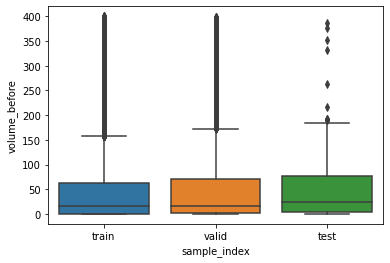

In [104]:
sns.boxplot(x='sample_index', y='volume_before',
            data=all_source_code_data.loc[all_source_code_data['volume_before'] <= 400]);

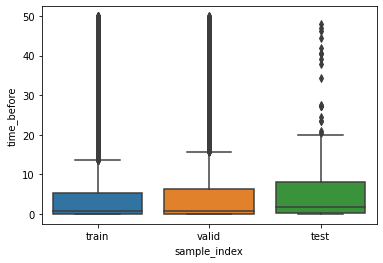

In [105]:
sns.boxplot(x='sample_index', y='time_before',
            data=all_source_code_data.loc[all_source_code_data['time_before'] <= 50]);

Теперь по метрикам blank, single_comments, lloc, loc, multi и sloc.

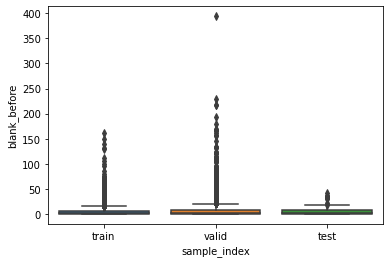

In [106]:
sns.boxplot(x='sample_index', y='blank_before',
            data=all_source_code_data);

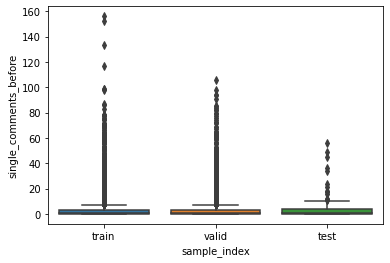

In [107]:
sns.boxplot(x='sample_index', y='single_comments_before',
            data=all_source_code_data);

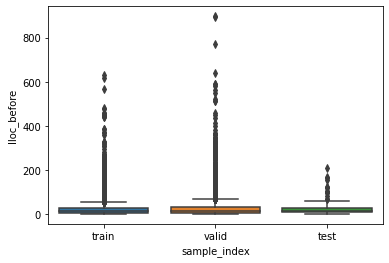

In [108]:
sns.boxplot(x='sample_index', y='lloc_before',
            data=all_source_code_data);

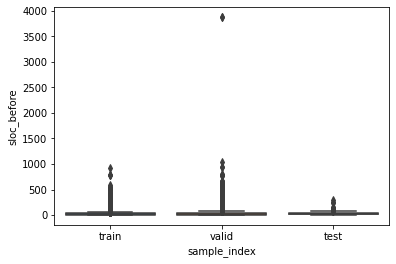

In [109]:
sns.boxplot(x='sample_index', y='sloc_before',
            data=all_source_code_data);

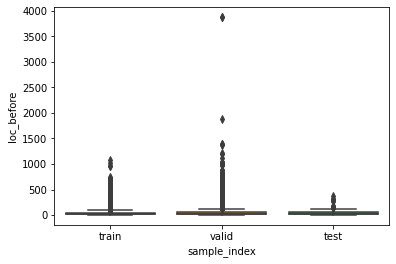

In [110]:
sns.boxplot(x='sample_index', y='loc_before',
            data=all_source_code_data);

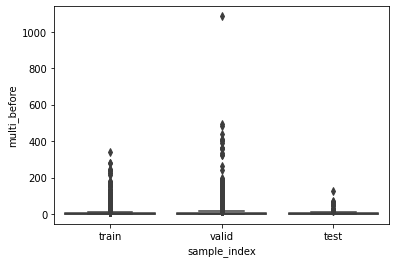

In [111]:
sns.boxplot(x='sample_index', y='multi_before',
            data=all_source_code_data);

Теперь удалим выбросы:

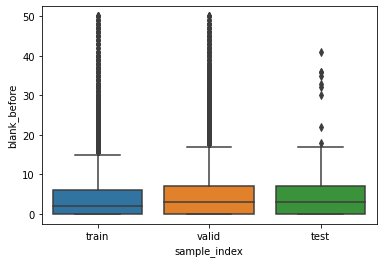

In [112]:
sns.boxplot(x='sample_index', y='blank_before',
            data=all_source_code_data.loc[all_source_code_data['blank_before'] <= 50]);

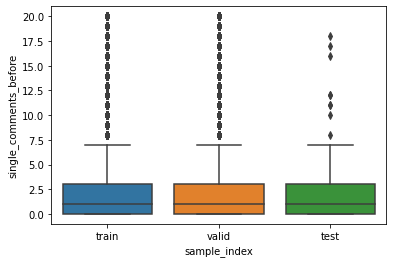

In [113]:
sns.boxplot(x='sample_index', y='single_comments_before',
            data=all_source_code_data.loc[all_source_code_data['single_comments_before'] <= 20]);

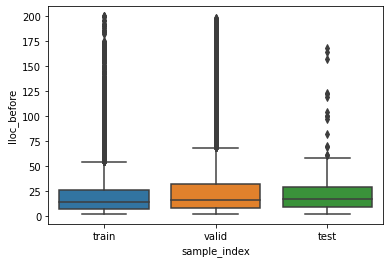

In [114]:
sns.boxplot(x='sample_index', y='lloc_before',
            data=all_source_code_data.loc[all_source_code_data['lloc_before'] <= 200]);

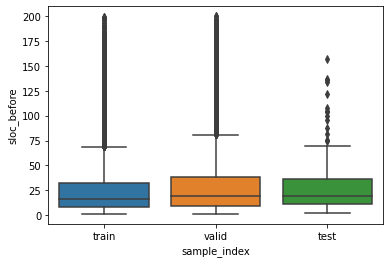

In [115]:
sns.boxplot(x='sample_index', y='sloc_before',
            data=all_source_code_data.loc[all_source_code_data['sloc_before'] <= 200]);

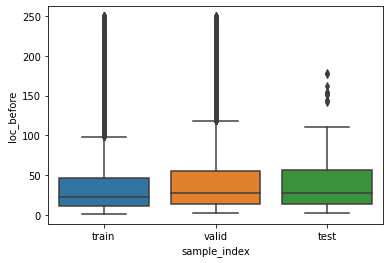

In [116]:
sns.boxplot(x='sample_index', y='loc_before',
            data=all_source_code_data.loc[all_source_code_data['loc_before'] <= 250]);

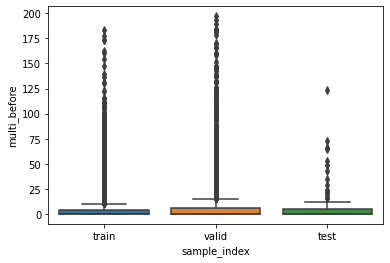

In [117]:
sns.boxplot(x='sample_index', y='multi_before',
            data=all_source_code_data.loc[all_source_code_data['multi_before'] <= 200]);

Теперь для индекса исправляемости:

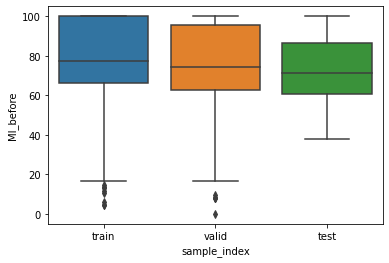

In [118]:
sns.boxplot(x='sample_index', y='MI_before',
            data=all_source_code_data);

По остальным метрикам разница небольшая.

# Анализ разностей метрик

Выясним, являются ли изменения всех метрик в ответ на исправление ошибок статистически значимыми.

In [119]:
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import wilcoxon

In [120]:
def significantDifferences(data, 
                           difference_features, 
                           test_function,
                           test_key_params={},
                           confidence_level=0.05):
    p_values = []
    for feature_name in difference_features:
        p_values.append(test_function(data[feature_name], **test_key_params)[1])
    is_feature_predictive, features_p_values_corrected, _, _ = multipletests(p_values, 
                                                                             alpha=confidence_level,
                                                                             method='fdr_bh',
                                                                             returnsorted=False)
    return [feature_name for i, feature_name in enumerate(difference_features) if is_feature_predictive[i]], features_p_values_corrected

In [121]:
for metric_name in metrics_names:
    source_code_data[metric_name + '_difference'] = source_code_data[metric_name + '_after'] - source_code_data[metric_name + '_before']

Применим для оценки статистической значимости два статистических критерия для зависимых наблюдений.

In [122]:
sign_predictive_metrics_names, sign_p_values = significantDifferences(source_code_data, 
                                                                      [metric_name + '_difference' for metric_name in metrics_names],
                                                                      test_function=sign_test,
                                                                      confidence_level=0.01)

In [123]:
w_predictive_metrics_names, w_p_values = significantDifferences(source_code_data, 
                                                                [metric_name + '_difference' for metric_name in metrics_names],
                                                                test_function=wilcoxon,
                                                                test_key_params = {'zero_method':'wilcox'},
                                                                confidence_level=0.01)

Объединим множества метрик, изменения по которым оказались статистически значимыми. Получилось, что изменения по всем метрикам статистически значимы.

In [124]:
set(sign_predictive_metrics_names) | set(w_predictive_metrics_names)

{'MI_difference',
 'N1_difference',
 'N2_difference',
 'blank_difference',
 'bugs_difference',
 'calculated_length_difference',
 'cc_difference',
 'difficulty_difference',
 'effort_difference',
 'h1_difference',
 'h2_difference',
 'length_difference',
 'lloc_difference',
 'loc_difference',
 'multi_difference',
 'single_comments_difference',
 'sloc_difference',
 'time_difference',
 'vocabulary_difference',
 'volume_difference'}

In [125]:
len(metrics_names)

20

## Корреляции

In [126]:
source_code_data[[metric_name + '_difference' for metric_name in metrics_names]].corr(method='spearman')

,cc_difference,N1_difference,N2_difference,bugs_difference,calculated_length_difference,difficulty_difference,effort_difference,h1_difference,h2_difference,length_difference,time_difference,vocabulary_difference,volume_difference,blank_difference,single_comments_difference,lloc_difference,loc_difference,multi_difference,sloc_difference,MI_difference
cc_difference,1.000000,0.684747,0.684048,0.674299,0.650819,0.526455,0.660445,0.566840,0.660823,0.684829,0.660445,0.664825,0.674300,0.322101,0.308989,0.721770,0.655669,0.055334,0.687680,-0.526472
N1_difference,0.684747,1.000000,0.986759,0.975576,0.935395,0.745681,0.954218,0.797046,0.948562,0.989310,0.954218,0.952942,0.975576,0.285492,0.265362,0.530398,0.501587,0.044802,0.515189,-0.562866
N2_difference,0.684048,0.986759,1.000000,0.986612,0.947644,0.737475,0.960643,0.790351,0.959629,0.999009,0.960643,0.961117,0.986612,0.279345,0.261782,0.522916,0.496294,0.046153,0.510124,-0.564231
bugs_difference,0.674299,0.975576,0.986612,1.000000,0.964964,0.706710,0.949390,0.780428,0.964785,0.986719,0.949390,0.969694,1.000000,0.277637,0.260499,0.515673,0.490814,0.044598,0.503657,-0.553950
calculated_length_difference,0.650819,0.935395,0.947644,0.964964,1.000000,0.664079,0.911902,0.782800,0.976538,0.946426,0.911902,0.981536,0.964964,0.270150,0.254118,0.491033,0.470116,0.042555,0.481271,-0.529782
difficulty_difference,0.526455,0.745681,0.737475,0.706710,0.664079,1.000000,0.759773,0.875672,0.673052,0.738089,0.759773,0.714902,0.706710,0.231544,0.207632,0.418980,0.391640,0.044666,0.402365,-0.461775
effort_difference,0.660445,0.954218,0.960643,0.949390,0.911902,0.759773,1.000000,0.794450,0.903456,0.960847,1.000000,0.921827,0.949390,0.274756,0.258183,0.507356,0.482334,0.045969,0.494462,-0.528719
h1_difference,0.566840,0.797046,0.790351,0.780428,0.782800,0.875672,0.794450,1.000000,0.795469,0.790847,0.794450,0.838393,0.780427,0.252140,0.224536,0.438953,0.416136,0.048542,0.425752,-0.499784
h2_difference,0.660823,0.948562,0.959629,0.964785,0.976538,0.673052,0.903456,0.795469,1.000000,0.958570,0.903456,0.989320,0.964785,0.272590,0.251373,0.497443,0.476248,0.045925,0.488030,-0.556944
length_difference,0.684829,0.989310,0.999009,0.986719,0.946426,0.738089,0.960847,0.790847,0.958570,1.000000,0.960848,0.960243,0.986719,0.280657,0.262551,0.524267,0.497434,0.046535,0.510932,-0.564794
